# Playstore Data Analysis

### Lets import important libraries that i will use through out the project

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')

#### First few rows of the data

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

We will convert the data type of Installs, Price and Size to numeric so that we can perform calculations.

In [5]:
df.shape

(10841, 13)

We have 10,841 rows and 13 columns

#### Lets explore some features one by one

In [6]:
df.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [7]:
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [8]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [9]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [10]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [11]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [12]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [13]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [14]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

### DATA PREPARATION AND CLEANING

Lets drop these 2 feature as I am not going to use in the analysis.

In [15]:
df = df.drop(columns=['Current Ver','Android Ver'])

We have to clean the 'Installs' and 'Price' before we can convert them to numerical data type

In [16]:
character = ['"','+',',','$']
cols = ['Installs','Price']
#using this formula we will clean all these characters present in those columns values
for col in cols:
    for char in character:
        df[col] = df[col].apply(lambda x: x.replace(char,''))

In [17]:
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

There is one value "Everyone" which needs to be treated before we can convert to numerical value.

In [18]:
 df[df['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


The information has not been recorded properly for this app. So in this case we will drop the app

In [19]:
df.drop(df[df['Price']=='Everyone'].index, inplace=True)

Converting the datatypes

In [20]:
df['Price'] = df.Price.astype(float)

In [21]:
df['Installs'] = df.Installs.astype(float)

In [22]:
df['Reviews'] = df['Reviews'].astype(int)

In [23]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'].apply(lambda x: x.replace('"','')))

In [24]:
#the values are very long in the install and reviews column so lets convert installs into millions & reviews in thausands units
cols = ['Reviews','Installs']
for col in cols:
    if col == 'Reviews':
        df[col] = round(df[col]/1000,2)
    else:
        df[col] = round(df[col]/1000000,2)

In [25]:
#Converting all the values in 'Size' into MB unit
cleaned_values = []
for i in df['Size']:
    i = i.replace('+','').replace(',','')
    i = i.replace('M','')
    if 'k' in i:
        i = i.replace('k','')
        i = float(i)/1000.0
    cleaned_values.append(i)

In [26]:
df['Size'] = cleaned_values

All the Columns have right datatype now.

In [27]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                      object
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
dtype: object

In [28]:
#Checking for the duplocates
print('duplicated values in the dataset: ',len(df[df.duplicated()]))

duplicated values in the dataset:  592


In [29]:
df[df.duplicated(subset='App')].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2.49,3.8,0.5,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23.16,26,1.0,Free,0.00,Everyone,Medical,2018-07-27
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,0.01,3.8,0.0,Paid,16.99,Everyone,Medical,2017-01-27
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11.51,15,0.1,Free,0.00,Everyone,Health & Fitness,2018-08-02
5415,365Scores - Live Scores,SPORTS,4.6,666.25,25,10.0,Free,0.00,Everyone,Sports,2018-07-29
...,...,...,...,...,...,...,...,...,...,...,...
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133.83,34,10.0,Free,0.00,Everyone 10+,Sports,2018-07-25
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133.82,34,10.0,Free,0.00,Everyone 10+,Sports,2018-07-25
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219.85,Varies with device,50.0,Free,0.00,Everyone,Travel & Local,2018-08-02
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219.85,Varies with device,50.0,Free,0.00,Everyone,Travel & Local,2018-08-02


There are many duplicated App names which store similiar information. So we consider it has duplicated values and drop it

In [30]:
df.drop_duplicates(subset=['App'],inplace=True)

### Checking for missing values

In [31]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

We have 1,463 data points missing for the rating feature, lets visualise it.

<AxesSubplot:>

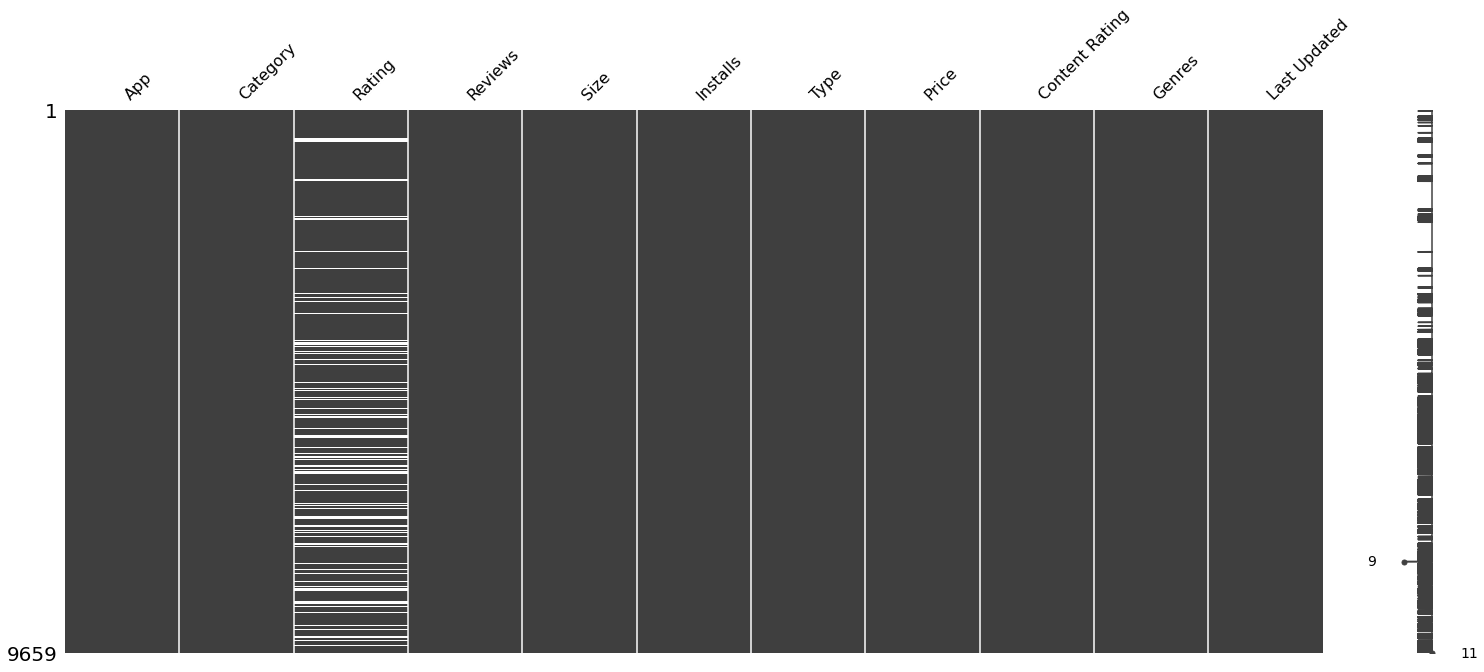

In [32]:
msno.matrix(df)

In [33]:
#We will isolate the missing and complete values aside

missing = df[df['Rating'].isnull()]
complete = df[~df['Rating'].isnull()]

In [34]:
#Describing the complete and missing values

print('Complete values')
display(complete.describe())
print('Missing values')
display(missing.describe())

Complete values


,Rating,Reviews,Installs,Price
count,8196.000000,8196.000000,8196.000000,8196.000000
mean,4.173243,255.251413,9.164729,1.037884
std,0.536625,1985.593897,58.250922,16.857882
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,0.130000,0.010000,0.000000
50%,4.300000,3.000000,0.100000,0.000000
75%,4.500000,43.812500,1.000000,0.000000
max,5.000000,78158.310000,1000.000000,400.000000


Missing values


,Rating,Reviews,Installs,Price
count,0.0,1463.000000,1463.000000,1463.000000
mean,NaN,0.017471,0.003650,1.443356
std,NaN,0.140599,0.040894,16.821624
min,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000
max,NaN,3.250000,1.000000,399.990000


#### Few interesting things to notice here:
- The average installs for complete dataset's apps is 16M and for incomplete dataset's apps is only 3,713 (the average install would be even lower if rule out the outlier (see 75% percentile value for installs with max value of install)).
- The average reviews for complete data apps are above 400k whereas for incomplete data it is very low.
- We can deduce that the we are missing the data for apps with very few downloads and reviews.

We can assume that we are missing information on apps who have very low installs and reviews. We confirm this visually using missingno matrix here

We have sorted the df by Installs and reviews in ascending order 

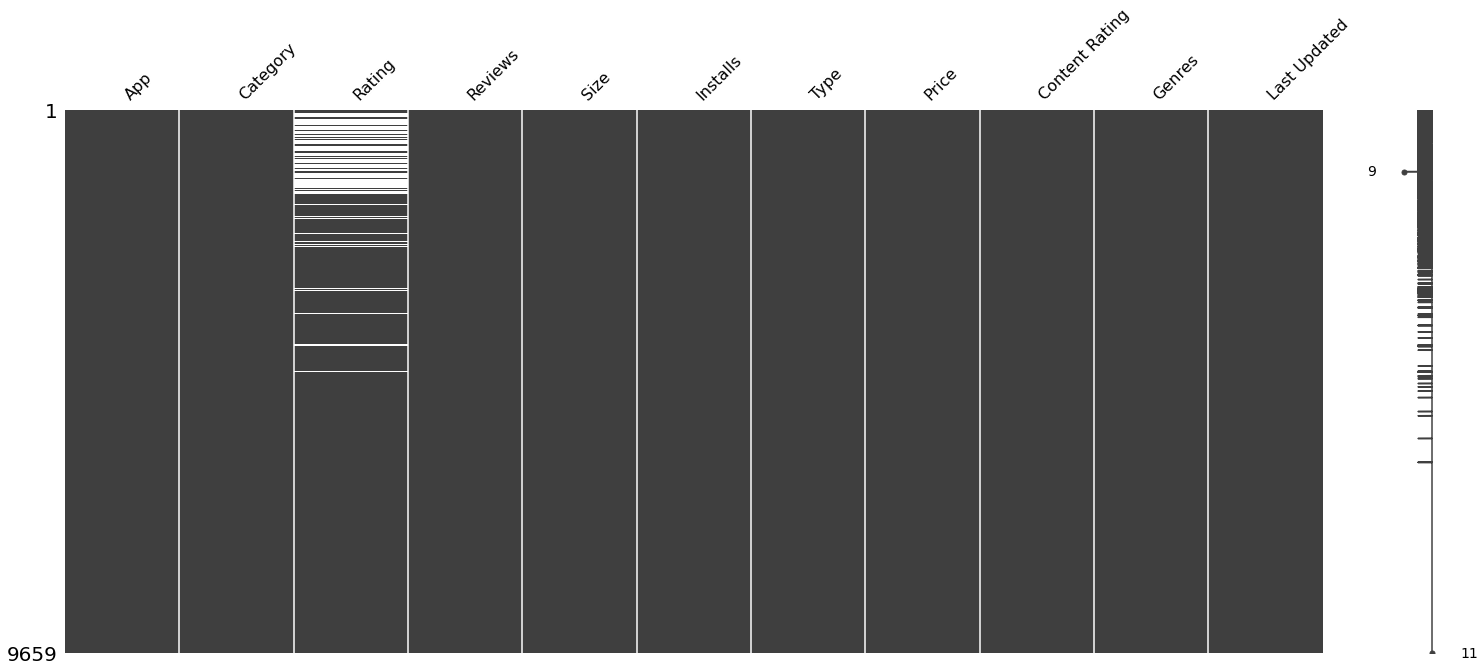

In [35]:
sorted_value = df.sort_values(['Installs','Reviews'])
msno.matrix(sorted_value)
plt.show()

The best idea here is to drop these rows as these apps does not have significant amounts of installs and reviews so they will not hinder our analysis much.

In [36]:
df.dropna(inplace=True)

In [37]:
#Checking if we have any values above 5 for rating feature
df[df['Rating']>5] #No result found so all good.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


## READY FOR ANALYSIS

#### What is the Average rating of playstore's apps looks like?

In [38]:
px.histogram(df, x="Rating", marginal='box')


- Oberservation: This is left-skewed histogram, which means most of the apps have above the average rating and there are only few apps which have a very low rating.

#### What is the Average rating of Paid & Free Apps?

In [39]:
print('Average rating of Free apps',round(df.loc[df['Type']=='Free','Rating'].mean(),2))
print('Average rating of paid apps',round(df.loc[df['Type']=='Paid','Rating'].mean(),2))
px.box(df, x='Type',y='Rating')

Average rating of Free apps 4.17
Average rating of paid apps 4.26


#### Observation:

- Paid apps have  slightly higher rating (not significant) than the free apps if we compare minimum, mean and median value. 
- Free apps have high number of outliers compared paid apps meaning there are apps whose ratings are below 3.

#### Q Which category has the highest  and lowest number of apps? 

In [40]:
no_of_apps = df.groupby('Category',as_index=False)['App'].count().sort_values('App',ascending=False)

fig = px.bar(no_of_apps,x='Category',y='App',title='Number of Per Category',text_auto='.2s')

fig.update_traces(textfont_size=12,textangle=0,textposition='outside',cliponaxis=False)

#### Percentage share of the apps by each category? 

In [41]:
Cat_share = round((df[['Category']].value_counts(normalize=True).to_frame().rename(columns={0:'Percentage'}))*100)
fig = px.pie(Cat_share.reset_index(),
       names='Category',
       values='Percentage',
       title='Total number of Apps Per Category')

fig.update_traces(textposition='inside',textinfo='percent+label')

#### Observation:

- Family has the highest number of apps, followed by Game and Tools (40% share)
- Beauty, Events, Parenting, Comics and Arts & Designs has the lowest number of apps.

#### What is the average Installs per app at playstore level?

In [42]:
print('Average dowloads per app: ',round(df.Installs.mean(),2))
px.box(df,'Installs',title='Distribution of installs')

Average dowloads per app:  9.16


#### Observation: 

- Majority of Installs are between 0-1 Millions range but we have few apps which has high number of installs up to a billion.
- The average download is 9 Million per app (Which is likely to be high due to presence of outliers)


#### Q. Which app categories has the highest and lowest average downloads?

Before we look at the average installs per app which should check out distribution installs each category because we assume that there will be outliers in each category which will skew the average.

In [43]:
plt.figure(figsize=(16,7))
px.strip(df,x='Category',y='Installs',color='Category',title='Distribution of Installs')


<Figure size 1152x504 with 0 Axes>

#### Observation:

- In each category, we have apps with very high installs relatively to other apps. 
- We have to treat the outliers in each category before we can work out average
- We will use IQR method to detect the outliers and replace them with median values (why not with mean value? Mean values are affected by the outliers whereas median are not much affected by it) .

In [44]:
df_no_outlier = df.copy()

category = list(df_no_outlier['Category'].unique())
for i in category:
    q3 = df_no_outlier.loc[df_no_outlier['Category']==i,'Installs'].quantile(0.75)
    q1 = df_no_outlier.loc[df_no_outlier['Category']==i,'Installs'].quantile(0.25)
    med = df_no_outlier.loc[df_no_outlier['Category']==i,'Installs'].quantile(0.50)
    iqr = q3 - q1
    upper_bound = q3 + (iqr*1.5)
    lower_bound = q1 - (iqr*1.5)
    df_no_outlier.loc[(df_no_outlier['Category']==i) & (df_no_outlier['Installs']>upper_bound) | (df_no_outlier['Installs']<lower_bound),'Installs'] = med

In [45]:
sort_installs = df_no_outlier.groupby('Category',as_index=False)['Installs'].mean().sort_values('Installs',ascending=False)
fig = px.bar(sort_installs,x='Category',
             y='Installs',
             text_auto='.2M',
             color='Category',
            title='Average Installs in Millions')
fig.update_traces(textfont_size=12, textangle=0, textposition='outside',cliponaxis=False)
fig.show()


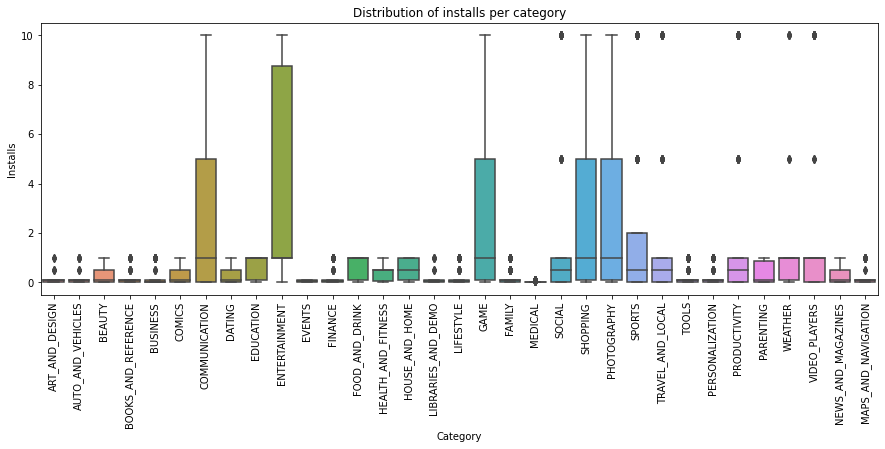

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_no_outlier,y= 'Installs',x='Category')
plt.title('Distribution of installs per category')
plt.xticks(rotation=90)
plt.show()

#### Observation:

- Entertaiments, Photography, Game, Shopping & Social have the highest average downloads.
- Medical, Events, Arts and design, business, Liberaries and demo lower average downloads.


#### Q. Which app category got the highest and lowest avg reviews reviews ?

Before we look at the average reviews per app which should check out distribution reviews each category because we assume that there will be outliers in each category which will skew the average.

In [47]:
plt.figure(figsize=(16,7))
px.strip(df,x='Category',y='Reviews',color='Category',title='Distribution of Reviews')


<Figure size 1152x504 with 0 Axes>

We have some extreme values for reviews in some categories. We need to treat it before we can work out the average

In [48]:
category = list(df_no_outlier['Category'].unique())
for i in category:
    q3 = df_no_outlier.loc[df_no_outlier['Category']==i,'Reviews'].quantile(0.75)
    q1 = df_no_outlier.loc[df_no_outlier['Category']==i,'Reviews'].quantile(0.25)
    med = df_no_outlier.loc[df_no_outlier['Category']==i,'Reviews'].quantile(0.50)
    iqr = q3 - q1
    upper_bound = q3 + (iqr*1.5)
    lower_bound = q1 - (iqr*1.5)
    df_no_outlier.loc[(df_no_outlier['Category']==i) & (df_no_outlier['Reviews']>upper_bound) | (df_no_outlier['Reviews']<lower_bound),'Reviews'] = med

In [49]:
sort_installs = df_no_outlier.groupby('Category',as_index=False)['Reviews'].mean().sort_values('Reviews',ascending=False)
fig = px.bar(sort_installs,x='Category',
             y='Reviews',
             text_auto='.2m',
             color='Category',
            title='Average Reviews in Thausands')
fig.update_traces(textfont_size=12, textangle=0, textposition='outside',cliponaxis=False)
fig.show()

#### Observation:

- Game, Photography, Social, Communication & Entertainment have the highest average reviews.
- Medical, Events, Beauty, events, Liberaries and demo have lower average reviews.
- Games has very high reviews compared to other categories

####  What is the overall app sizes on playstore?

In [50]:
cleaned_size_df = df_no_outlier[df_no_outlier['Size']!='Varies with device'].copy()
cleaned_size_df['Size'] = cleaned_size_df['Size'].astype('float')
print('The average size of the apps is: ',round(cleaned_size_df['Size'].mean()),'MB')
px.histogram(cleaned_size_df, x="Size", marginal='box')

The average size of the apps is:  22 MB


Most of the apps in the dataset has the size between 5MB and 33MB and an average of size of the Apps are 23MB

#### Q. In which categories tends to have larger and smaller  size Apps?

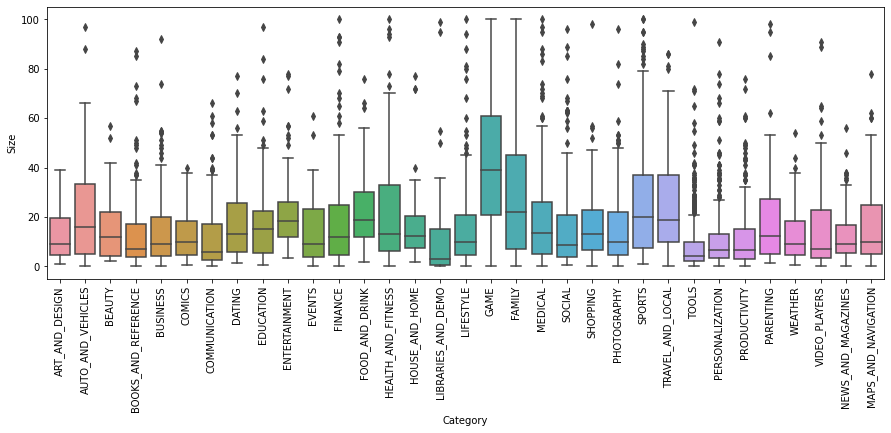

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(data=cleaned_size_df,y= 'Size',x='Category')
plt.xticks(rotation=90)
plt.show()

#### Observation:

- Games, Family, sports and travel apps have large size relative to other categories.
- Tools & Personalisation category tends to have relatively smaller size.

#### Q. We would also like to understand whether Apps rating have any relationship with number of downloads they have?

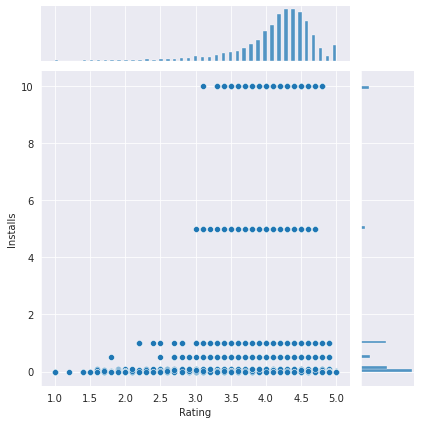

In [52]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.jointplot(data=df_no_outlier, x='Rating',y='Installs')

The relationship is very weak to deduce that higher rating results in high number of installs. The reason may be that people prefers to go through reviews when deciding to download an app.

#### Q. We would also like to understand whether Apps rating have any relationship with number of reviews they recieve?
For example, we can assume that really good performing apps may get relatively higher higher reviews.

Correlation between two variables:  0.1


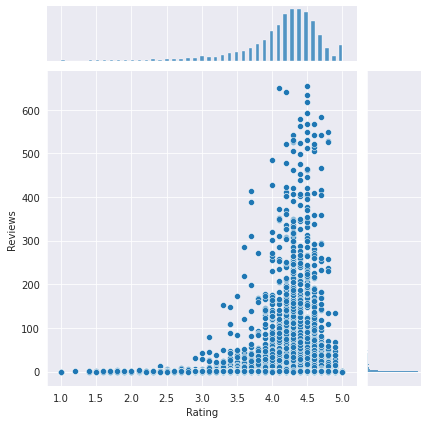

In [53]:
print('Correlation between two variables: ', round(np.corrcoef(df_no_outlier['Rating'], df_no_outlier['Reviews'])[0,1],1))
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.jointplot(data=df_no_outlier, x='Rating',y='Reviews')
plt.show()

Apps which have rating between 4.0 to 4.6 may get relatively higher reviews but that is because majority of apps are within that range (look at the below table) so we cannot confirm that there is strong relationship rating and reviews variable (correlation score is also very weak.

In [54]:
df_no_outlier['Rating'].value_counts().to_frame()

,Rating
4.3,897
4.4,895
4.5,848
4.2,810
4.6,683
4.1,621
4.0,513
4.7,442
3.9,359
3.8,286


#### Q. Does size of high rating apps differs from the low rating ones?

Correlation between two variables:  0.1


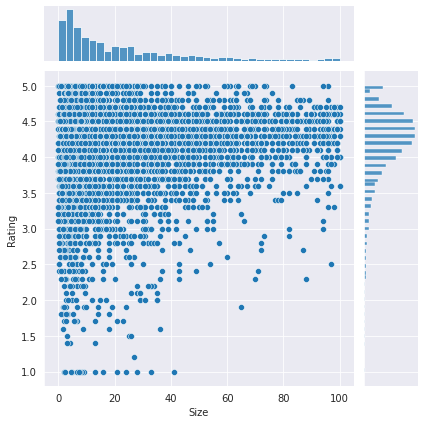

In [55]:
print('Correlation between two variables: ', round(np.corrcoef(cleaned_size_df['Size'], cleaned_size_df['Rating'])[0,1],1))
sns.set_style("darkgrid")
sns.jointplot(data=cleaned_size_df, x='Size',y='Rating')
plt.show()

We dont see any strong relationship between rating and size variable by looking at the graph and correlation.

#### Does size of high rating apps differs from the low rating ones?

Correlation between two variables:  0.6


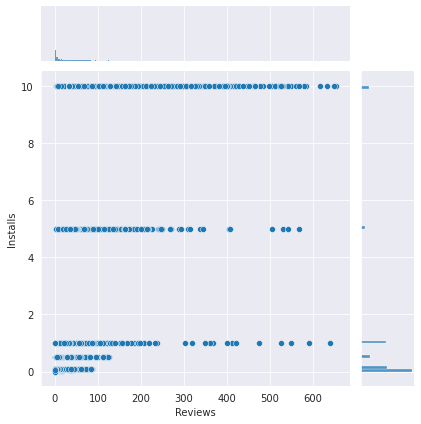

In [56]:
print('Correlation between two variables: ', round(np.corrcoef(df_no_outlier['Reviews'], df_no_outlier['Installs'])[0,1],1))
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.jointplot(data=df_no_outlier, x='Reviews',y='Installs')
plt.show()

There is positive relationship between number of reviews and installs, Apps with high number of reviews gets high number of numbers of installs as users prefers to go through reviews before installing the app.

#### How many Free and Paids are there in playstore?

In [57]:
df[['Type']].value_counts().to_frame().rename(columns={0:'App'})

,App
Type,
Free,7592
Paid,604


#### Which Categories have most paid Apps?

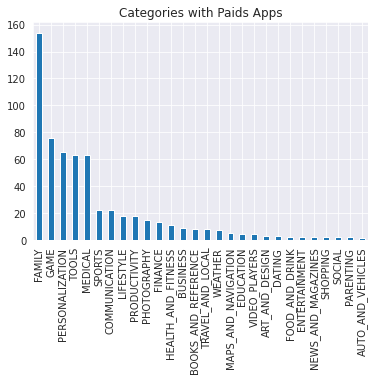

In [58]:
paid_apps = df_no_outlier[df_no_outlier['Type']=='Paid']

paid_apps['Category'].value_counts().plot(kind='bar')
plt.title('Categories with Paids Apps')
plt.show()

#### What is overall price level of Apps on playstore?

In [59]:
px.strip(paid_apps,x='Category',y='Price',color='Category')

We have few apps in some categories which have really high priced apps upto $400. Lets find what are these apps about.


In [60]:
paid_apps[paid_apps['Price']>300]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
4197,most expensive app (H),FAMILY,4.3,0.01,1.5,0.00,Paid,399.99,Everyone,Entertainment,2018-07-16
4362,💎 I'm rich,LIFESTYLE,3.8,0.72,26,0.01,Paid,399.99,Everyone,Lifestyle,2018-03-11
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,0.28,7.3,0.01,Paid,400.00,Everyone,Lifestyle,2018-05-03
5351,I am rich,LIFESTYLE,3.8,3.55,1.8,0.10,Paid,399.99,Everyone,Lifestyle,2018-01-12
5354,I am Rich Plus,FAMILY,4.0,0.86,8.7,0.01,Paid,399.99,Everyone,Entertainment,2018-05-19
5356,I Am Rich Premium,FINANCE,4.1,1.87,4.7,0.05,Paid,399.99,Everyone,Finance,2017-11-12
5357,I am extremely Rich,LIFESTYLE,2.9,0.04,2.9,0.00,Paid,379.99,Everyone,Lifestyle,2018-07-01
5358,I am Rich!,FINANCE,3.8,0.09,22,0.00,Paid,399.99,Everyone,Finance,2017-12-11
5359,I am rich(premium),FINANCE,3.5,0.47,0.965,0.00,Paid,399.99,Everyone,Finance,2017-05-01
5362,I Am Rich Pro,FAMILY,4.4,0.20,2.7,0.00,Paid,399.99,Everyone,Entertainment,2017-05-30


Lol so these high priced apps are not genuine and we should rule them out.

In [61]:
paid_apps = paid_apps[paid_apps['Price']<200]

In [62]:
px.box(paid_apps,x='Price')

Observation: Most of the Apps are priced between 1.985 usd and 4.99 usd

In [63]:
print('The most expensive App is: ',str(paid_apps.loc[paid_apps['Price']>50,'App'].values))

The most expensive App is:  ['Vargo Anesthesia Mega App']


#### Q. Which categories apps have higher price?

In [64]:
px.strip(paid_apps,x='Category',y='Price',color='Category')

Medical, Family and Game categories have more expensive apps compared to other apps by lookig at the distribution below.

#### Now we will seperate the App based on "Above" and "Below" Average installs to understand what traits above average apps and below average installs apps? 

In [65]:
condition = [
    (df_no_outlier['Installs']>df_no_outlier['Installs'].mean()),
    (df_no_outlier['Installs']<=df_no_outlier['Installs'].mean())
]

values = ['Above','Below']

In [66]:
df_no_outlier['Avg Installs'] = np.select(condition, values)

#### Does above average installs apps are havier compared to below average ones?

<AxesSubplot:xlabel='Size', ylabel='Avg Installs'>

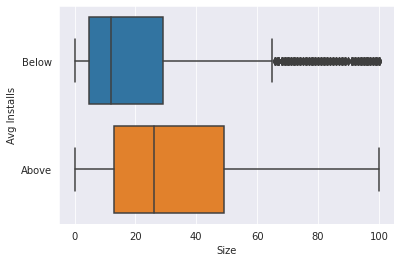

In [67]:
clean_sizz_df = df_no_outlier[df_no_outlier['Size']!='Varies with device'].copy()
clean_sizz_df['Size'] = clean_sizz_df['Size'].astype(float)
sns.boxplot(data=clean_sizz_df,x='Size',y='Avg Installs')

'Above average Installs' apps are likely to be havier than 'Below average' apps. the reason could that apps that have higher downloads tends to have more functionality, better ui, features etc which results in bigger size

#### Q. How rating differs for 'below average installs' apps and above 'average installs' apps?

<AxesSubplot:xlabel='Rating', ylabel='Avg Installs'>

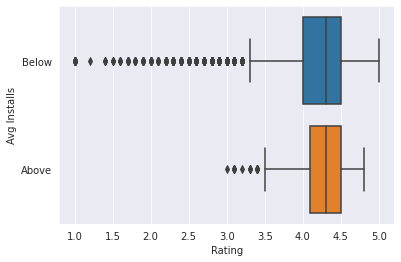

In [68]:
sns.boxplot(data=df_no_outlier,x='Rating',y='Avg Installs')

observation: most of the Below average apps have rating between 4-4.5 whereas for above average app rating is between 4.2-4.5

#### Which categories have most paid apps?

In [69]:
paid_apps.groupby('Category')['App'].count().to_frame().sort_values('App',ascending=False).head(5)

,App
Category,
FAMILY,150
GAME,76
PERSONALIZATION,65
TOOLS,63
MEDICAL,63


#### Q. In which categories Apps are expensive?

In [70]:
paid_apps.groupby('Category',as_index=False)['Price'].agg(['count','mean']).reset_index().rename(columns={'count':'No. of Apps','mean':'Average Price'}).sort_values('Average Price',ascending=False)

,Category,No. of Apps,Average Price
15,MEDICAL,63,9.902698
3,BUSINESS,9,7.156667
5,DATING,3,6.323333
13,LIFESTYLE,13,6.224615
9,FINANCE,7,5.704286
14,MAPS_AND_NAVIGATION,5,5.390000
19,PHOTOGRAPHY,15,4.820667
17,PARENTING,2,4.790000
25,TRAVEL_AND_LOCAL,8,4.686250
6,EDUCATION,4,4.490000


#### Observations:

- Medical apps are comparitively expensive compared to other categories.
- Family apps have most number of paid apps but they have moderate pricing and same holds for game category. 
- Personalization apps have cheapest average price.

#### Q. Do heavy apps are higher in prices?

We are assuming this because heavy apps have more features, functionality etc which may lead high charge in prices.

<AxesSubplot:xlabel='Size', ylabel='Price'>

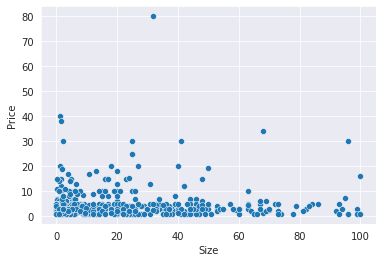

In [71]:
paid_apps = paid_apps[paid_apps['Size']!='Varies with device']
paid_apps['Size'] = paid_apps['Size'].astype(float)
sns.scatterplot(data=paid_apps,x='Size',y='Price')

There are few apps which have higher price and are bigger in size but most of the apps does not prove that relationship.

#### Q. Does Size differs with content rating?

<AxesSubplot:xlabel='Content Rating', ylabel='Size'>

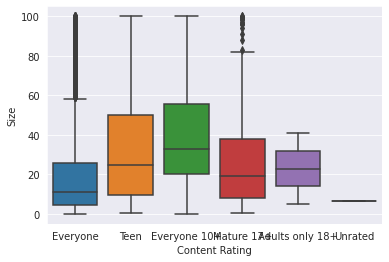

In [72]:
df_clean_size = df[df['Size']!='Varies with device'].copy()
df_clean_size['Size'] = df_clean_size['Size'].astype(float) 
sns.boxplot(data=df_clean_size,x='Content Rating',y='Size')

#### Q. In which month most updates takes place?

<AxesSubplot:xlabel='Month'>

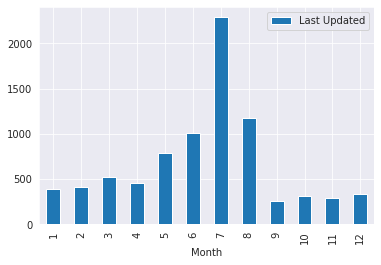

In [73]:
df_no_outlier['Month'] = df['Last Updated'].dt.month
df_no_outlier.groupby('Month')[['Last Updated']].count().plot(kind='bar')